### Importacion de Datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Variables 
Descripcion de las variables a trabajar

1.ID : ID del cliente

2.Age : Edad del cliente

3.Experience : #años de experiencia

4.Income : Ingreso anual de cliente ($000)

5.ZIP Code : Código ZIP de casa.

6.Family : Número de miembros familiares

7.CCAvg : Promedio de Gasto en Tarjetas de crédito por mes ($000)

8.Education : Nivel de Educación.
1: No graduado;
2: Graduado;
3: Profesional

9.Mortgage : Valor de hipoteca, si existiera. ($000)

10.Personal Loan : Aceptó el cliente el crédito personal ofrecido en la última campaña?

11.Securities Account : El cliente tiene una cuenta con activos financieros con el banco?

12.CD Account : El cliente tiene una cuenta certificada de deposito(CD) con el banco?

13.Online : El cliente usa medios de banca por internet?

14.Credit card : El cliente usa tarjeta de crédito manejada por algún otro banco?

In [3]:
#Importar Base de datos
df = pd.read_csv('Model_creditoPersonal.xls')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Descriptivo

In [4]:
# Previsualizamos el Dtype de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Analizamos la distribucion de una variable Categorica (Education)
print('Proporcion Educacion')
print('1: No graduado 2: Graduado 3: Profesional')
df['Education'].value_counts(normalize=True)*100                     # El parametro Normalizer True Nos muestra la informacion en porcentajes
                                                                     # Podemos Acceder a la data por Index Or Value

Proporcion Educacion
1: No graduado 2: Graduado 3: Profesional


1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

In [6]:
# Parametrizamos las variables Income y Mortgage Dividiendo entre 10 para simular Cifras mas proporcionales a CCAvg y suponer Millones COP
df['Income'] = df['Income']/10     # Ingresos
df['Mortgage'] = df['Income']/10   # Valor Hipoteca

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
# Analisis Descriptivo
# Excluimos Count ya que no representa valor
# Excluimos la variable ID, ZIP Code
print('Identificamos Variables Binarias Cuyo Max es 1 y Min es Cero: Personal Loan, Securities Account, CD Account, Online, CreditCard')
df.drop(["ID", "ZIP Code"], axis=1).describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]]

Identificamos Variables Binarias Cuyo Max es 1 y Min es Cero: Personal Loan, Securities Account, CD Account, Online, CreditCard


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
mean,45.338400,20.104600,7.377420,2.396400,1.937938,1.881000,0.737742,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,4.603373,1.147663,1.747659,0.839869,0.460337,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,0.800000,1.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,3.900000,1.000000,0.700000,1.000000,0.390000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,6.400000,2.000000,1.500000,2.000000,0.640000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,9.800000,3.000000,2.500000,3.000000,0.980000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,22.400000,4.000000,10.000000,3.000000,2.240000,1.000000,1.000000,1.00000,1.000000,1.000000


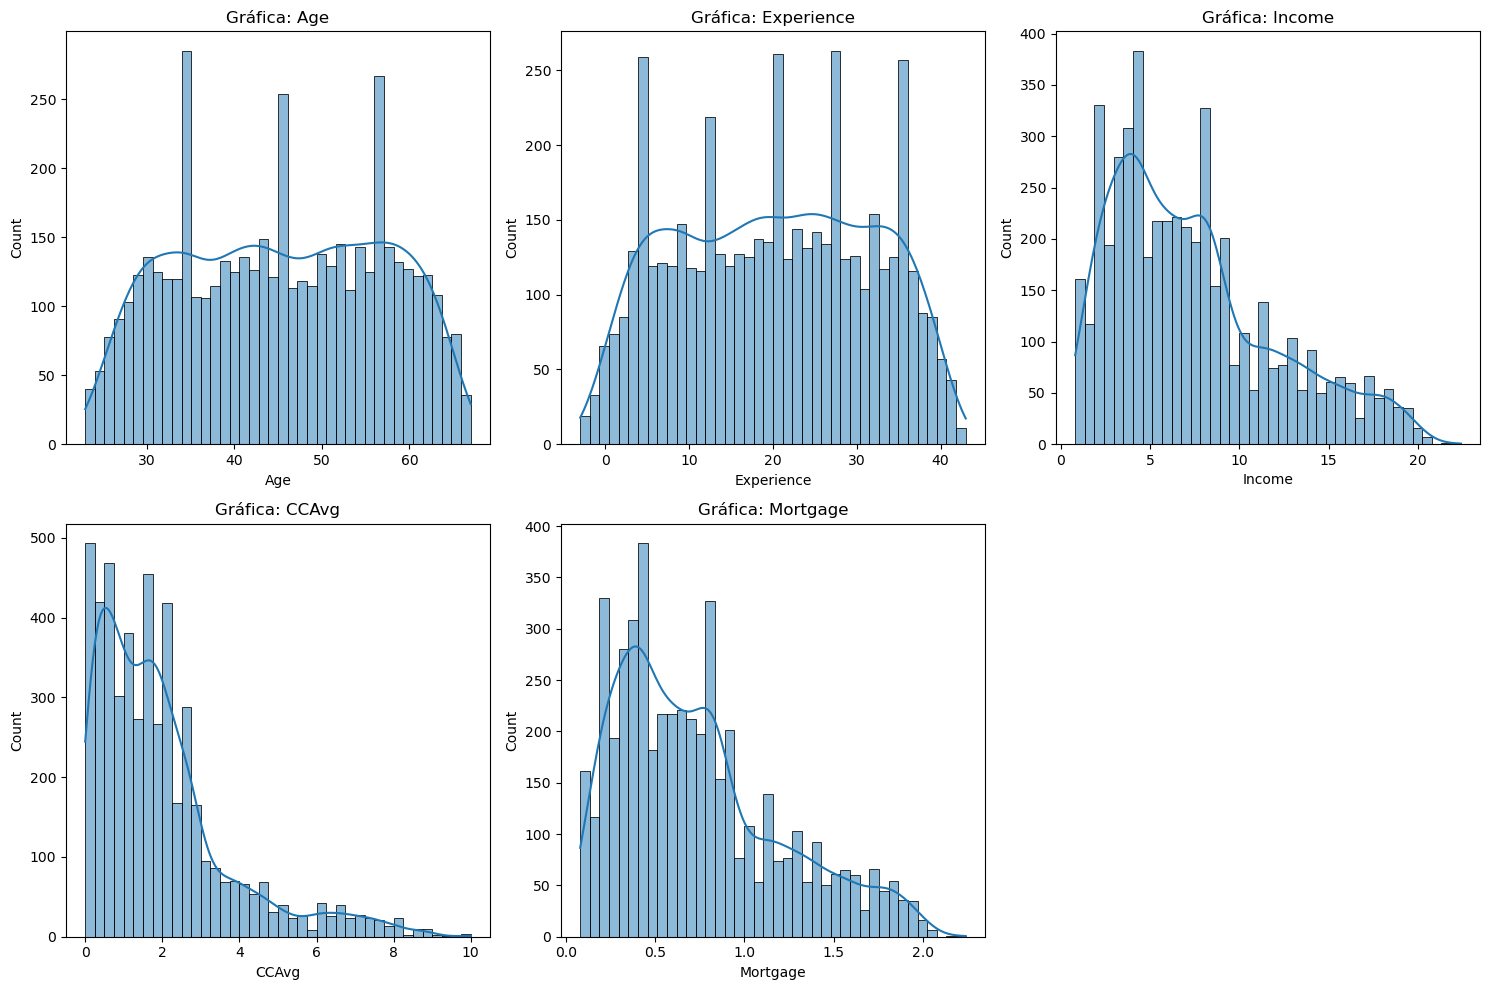

In [21]:
# Analizamos distribucion de variables Excluyendo las categoricas

import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables a graficar
Vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Ajusta el tamaño de la figura

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las variables y crear los histogramas
for i, col in enumerate(Vars):
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(f'Gráfica: {col}')

# Ocultar el último subgráfico si el número de variables es impar
if len(Vars) < len(axes):
    for j in range(len(Vars), len(axes)):
        fig.delaxes(axes[j])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

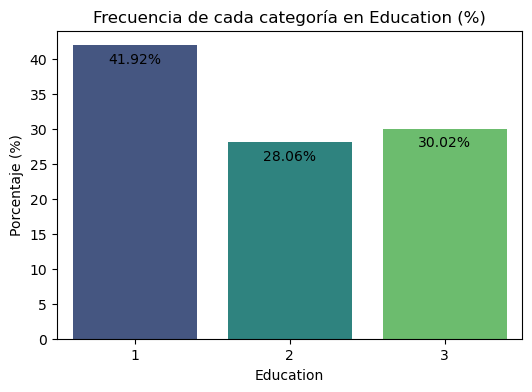

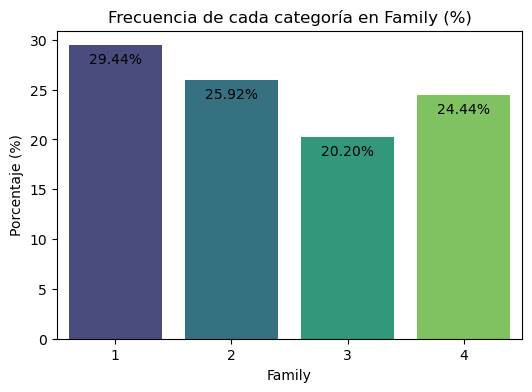

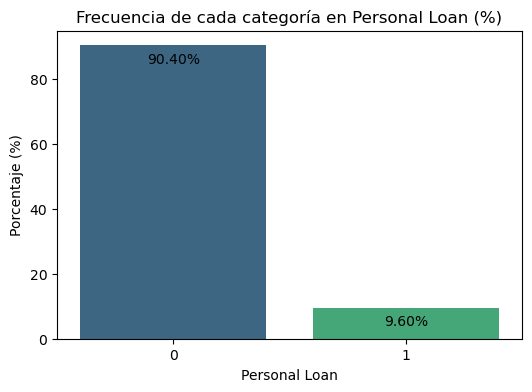

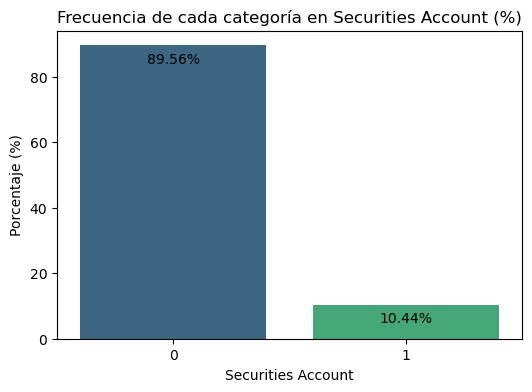

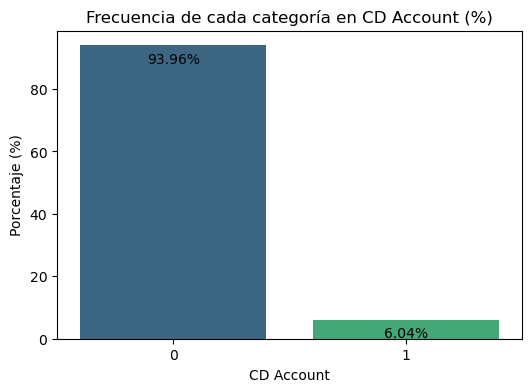

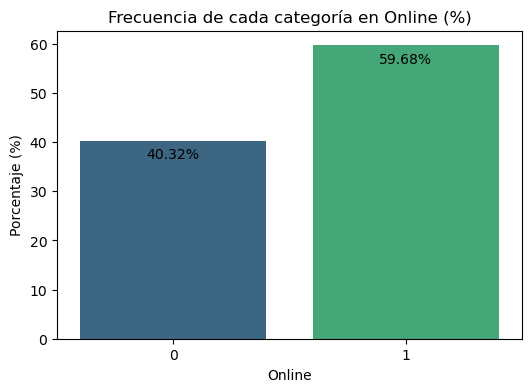

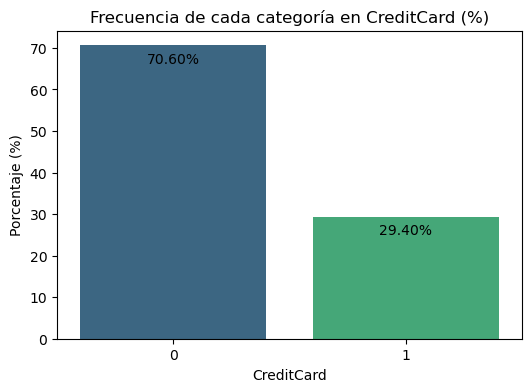

In [10]:
CategoricalVars = ['Education', 'Family', 'Personal Loan', 'Securities Account',
                   'CD Account', 'Online', 'CreditCard']

for col in CategoricalVars:
    plt.figure(figsize=(6, 4))
    # Calcular las frecuencias relativas y redondear a 2 decimales
    frecuencias = (df[col].value_counts(normalize=True) * 100).round(2)
    ax = sns.barplot(x=frecuencias.index, y=frecuencias.values, palette="viridis")
    plt.title(f"Frecuencia de cada categoría en {col} (%)")
    plt.xlabel(col)
    plt.ylabel("Porcentaje (%)")
    
    # Agregar etiquetas a las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%',                          # Texto a mostrar (valor de la barra)
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Posición del texto
                    ha='center', va='center',                          # Alineación horizontal y vertical
                    xytext=(0, -10),                                     # Desplazamiento del texto respecto a la posición
                    textcoords='offset points')                        # Tipo de coordenadas para el desplazamiento
    
    plt.show()

Matriz de correlación:


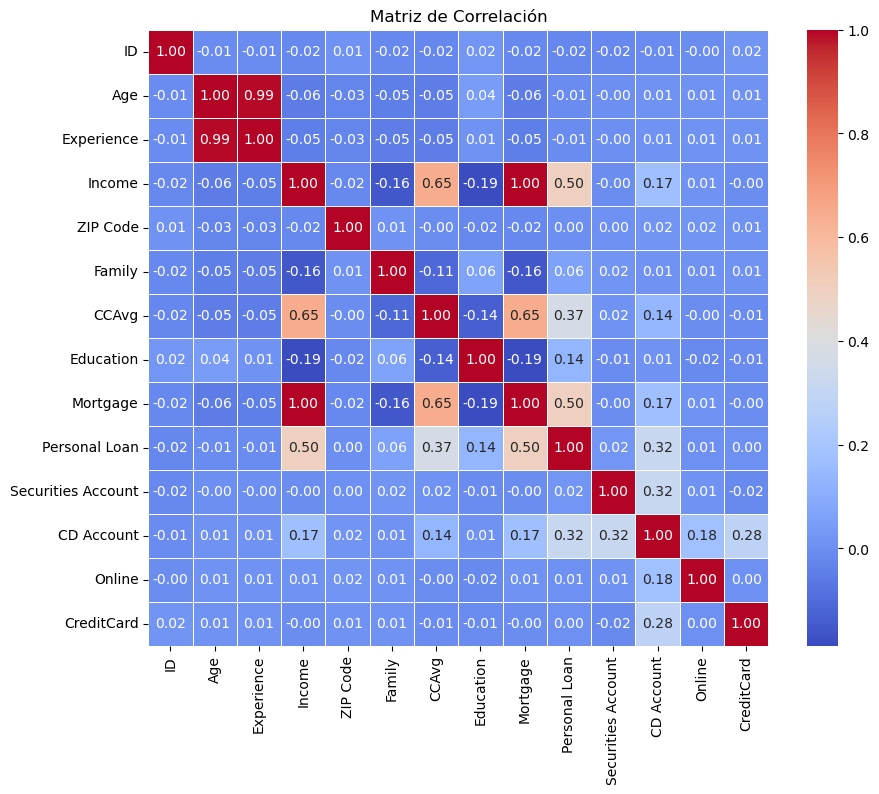

In [11]:
# Cargar los datos (asumiendo que ya tienes un DataFrame df)
# df = pd.read_csv('tu_archivo.csv')

# Seleccionar solo las variables numéricas
variables_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
matriz_correlacion = variables_numericas.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
# print(matriz_correlacion) 

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

#### Random forest

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar los datos (asumiendo que ya tienes un DataFrame df)
# df = pd.read_csv('tu_archivo.csv')

# 1. Preprocesamiento de datos

# Eliminar columnas irrelevantes
X = df.drop(columns=['ID', 'ZIP Code', 'Personal Loan', 'Experience','Mortgage', 'Securities Account', 'Online', 'CreditCard'])   # Variables predictoras
y = df['Personal Loan']                                    # Variable objetivo

# Codificar variables categóricas (Education)
X = pd.get_dummies(X, columns=['Education'], drop_first=True)



In [13]:
X

,Age,Income,Family,CCAvg,CD Account,Education_2,Education_3
0,25,4.9,4,1.6,0,0,0
1,45,3.4,3,1.5,0,0,0
2,39,1.1,1,1.0,0,0,0
3,35,10.0,1,2.7,0,1,0
4,35,4.5,4,1.0,0,1,0
...,...,...,...,...,...,...,...
4995,29,4.0,1,1.9,0,0,1
4996,30,1.5,4,0.4,0,0,0
4997,63,2.4,2,0.3,0,0,1
4998,65,4.9,3,0.5,0,1,0


In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 2. Entrenar el modelo
# Crear una instancia de RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árboles
# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# 3. Evaluar el modelo
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar métricas de evaluación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nExactitud (Accuracy):", accuracy_score(y_test, y_pred))

Matriz de confusión:
[[893   2]
 [  7  98]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.93      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000


Exactitud (Accuracy): 0.991


### Guardado de Modelo

In [17]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']